In [1]:
#import pandas and json libraries
import pandas as pd
import json

In [2]:
# For this project, we have used business.json and review.json files from yelp dataset
file_, review_ = ['yelp_dataset\\business.json','yelp_dataset\\review.json']

In [3]:
# Load files as pandas dataframe df
with open(file_, encoding = 'utf-8') as file:
    df_ = pd.DataFrame(json.loads(line) for line in file)

In [4]:
df_.head(5)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'Ambience': '{'romantic': False, 'intimate': ...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Saturday': '9:0-1:0', '...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'Ambience': '{'romantic': False, 'intimate': ...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Saturday': '17:30-2...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Friday': '8:0-17:0', 'Monday': '8:0-17:0', '...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsCreditCards': 'True', 'Busine...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Saturday': '7:0-23:0',...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [5]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
address         192609 non-null object
attributes      163773 non-null object
business_id     192609 non-null object
categories      192127 non-null object
city            192609 non-null object
hours           147779 non-null object
is_open         192609 non-null int64
latitude        192609 non-null float64
longitude       192609 non-null float64
name            192609 non-null object
postal_code     192609 non-null object
review_count    192609 non-null int64
stars           192609 non-null float64
state           192609 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


In [6]:
# Filter the data based on only open restaurants
df_ = df_[df_['is_open'] == 1]

In [7]:
# load review data as pandas dataframe
with open(review_, encoding = 'utf-8') as file:
    review_ = pd.DataFrame(json.loads(line) for line in file)

In [8]:
review_.head(5)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg
2,WTqjgwHlXbSFevF32_DJVw,0,2016-11-09 20:09:03,0,2TzJjDVDEuAW6MR5Vuc1ug,5.0,I have to say that this office really has it t...,3,n6-Gk65cPZL6Uz8qRm3NYw
3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,yi0R0Ugj_xUx_Nek0-_Qig,5.0,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg
4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0,11a8sVPMUFtaC7_ABRkmtw,1.0,Today was my second out of three sessions I ha...,7,ssoyf2_x0EQMed6fgHeMyQ


In [9]:
review_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6685900 entries, 0 to 6685899
Data columns (total 9 columns):
business_id    object
cool           int64
date           object
funny          int64
review_id      object
stars          float64
text           object
useful         int64
user_id        object
dtypes: float64(1), int64(3), object(5)
memory usage: 459.1+ MB


In [10]:
# In order to focus on the current conditions of the business and focus our results based on new scenarios, 
#we have considered data only after 2015 for the analysis in this project

df_review = review_[review_['date'] > '2015-01-01']

In [11]:
# Feature selection for review dataset to filter data
fs_ = ['business_id','cool','funny','stars','text','useful','user_id']
df_review = df_review.filter(items = fs_)

In [12]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446521 entries, 1 to 6685899
Data columns (total 7 columns):
business_id    object
cool           int64
funny          int64
stars          float64
text           object
useful         int64
user_id        object
dtypes: float64(1), int64(3), object(3)
memory usage: 271.4+ MB


In [13]:
# For the purpose of this project, we have experimented with a specefic location, Las Vegas in this case.
df_lv = df_[df_['city'] == 'Las Vegas']

In [14]:
# feature selection fron dataset
fs = ['business_id','stars','categories','attributes']
df_fs = df_lv.filter(items = fs)

In [15]:
# rename the column name "stars" to "avg_stars" 
df_fs = df_fs.rename(index = str, columns = {"stars":"avg_stars"})

In [16]:
# As a part of data preprocessing, we remove null row for categories column and attributes column
category_null = ~df_fs['categories'].isnull()
attribute_null = ~df_fs['attributes'].isnull()
df_fs = df_fs[category_null & attribute_null]

In [17]:
# For this project, we only take restaurant for our analysis
restaurant = df_fs["categories"].str.contains("Restaurants")
df_fs = df_fs[restaurant]

In [18]:
df_fs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4097 entries, 25 to 192562
Data columns (total 4 columns):
business_id    4097 non-null object
avg_stars      4097 non-null float64
categories     4097 non-null object
attributes     4097 non-null object
dtypes: float64(1), object(3)
memory usage: 160.0+ KB


In [19]:
# set business_id as the index of two data frames
df_fs = df_fs.set_index('business_id')
df_review = df_review.set_index('business_id')

In [20]:
# combine 
df_final = df_review.join(df_fs,how = 'inner')
df_final.reset_index(inplace = True)

In [21]:
df_final.head(5)

,business_id,cool,funny,stars,text,useful,user_id,avg_stars,categories,attributes
0,--9e1ONYQuAa-CB_Rrw7Tw,0,0,2.0,Very busy and noisy restaurant.\nAsparagas was...,0,SFftbQSwHZ24ahhfj5vVxQ,4.0,"Cajun/Creole, Seafood, Steakhouses, Restaurants","{'Ambience': '{'romantic': False, 'intimate': ..."
1,--9e1ONYQuAa-CB_Rrw7Tw,0,0,5.0,On yelp 5 stars = Woohoo! as good as it gets! ...,0,joe4i-lcCFd2wViA2agGKw,4.0,"Cajun/Creole, Seafood, Steakhouses, Restaurants","{'Ambience': '{'romantic': False, 'intimate': ..."
2,--9e1ONYQuAa-CB_Rrw7Tw,0,0,5.0,A great culinary experience from start to fini...,0,y4O_c6UUAAtPb3Uk-T4t8A,4.0,"Cajun/Creole, Seafood, Steakhouses, Restaurants","{'Ambience': '{'romantic': False, 'intimate': ..."
3,--9e1ONYQuAa-CB_Rrw7Tw,0,0,5.0,Had the steak salad. It was amazing. Also had ...,0,qDzjg6Nvt4GKoPrNf3kArQ,4.0,"Cajun/Creole, Seafood, Steakhouses, Restaurants","{'Ambience': '{'romantic': False, 'intimate': ..."
4,--9e1ONYQuAa-CB_Rrw7Tw,0,0,5.0,Had Dinner at Delmonico on 11-5-15. Still the...,0,_0Za7N9v4rcUVxHy107a7Q,4.0,"Cajun/Creole, Seafood, Steakhouses, Restaurants","{'Ambience': '{'romantic': False, 'intimate': ..."


In [22]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709155 entries, 0 to 709154
Data columns (total 10 columns):
business_id    709155 non-null object
cool           709155 non-null int64
funny          709155 non-null int64
stars          709155 non-null float64
text           709155 non-null object
useful         709155 non-null int64
user_id        709155 non-null object
avg_stars      709155 non-null float64
categories     709155 non-null object
attributes     709155 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 54.1+ MB


In [23]:
# save the preprocessed data 
df_final.to_csv("yelp_dataset\\review_classification.csv", index = False, encoding='utf-8')

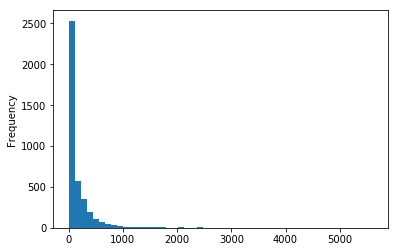

In [26]:
#plot
import matplotlib.pyplot as plt
% matplotlib inline
df_final['business_id'].value_counts().plot.hist(bins =50)
plt.show()